In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# para google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#_import__("matplotlib").use("Qt4Agg")
# %matplotlib ipympl
# path = "../datos/"

path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
datos = pd.read_csv(path + "insurance.csv", sep = ",")
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
datos.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
len(datos)

1338

In [ ]:
datos.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Vamos a hacer un gráfico que en el eje x tenga la edad y en el y el precio del seguro

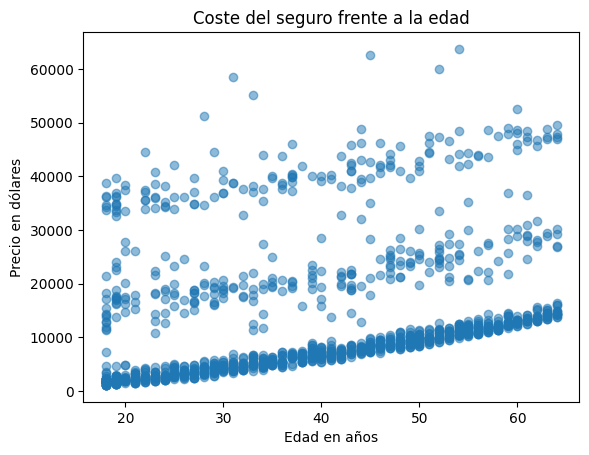

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x = "age", y = "charges",  data=datos, alpha = 0.5 )

ax.set_title("Coste del seguro frente a la edad")
ax.set_xlabel("Edad en años")
ax.set_ylabel("Precio en dólares")

plt.show()

Vamos a mostrar por separado fumadores y no, con colores diferentes. Hacemos una columna como smoker, pero en numero

In [ ]:
datos['fumador'] = datos.smoker.astype("category").cat.codes
datos.head()

,age,sex,bmi,children,smoker,region,charges,fumador
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


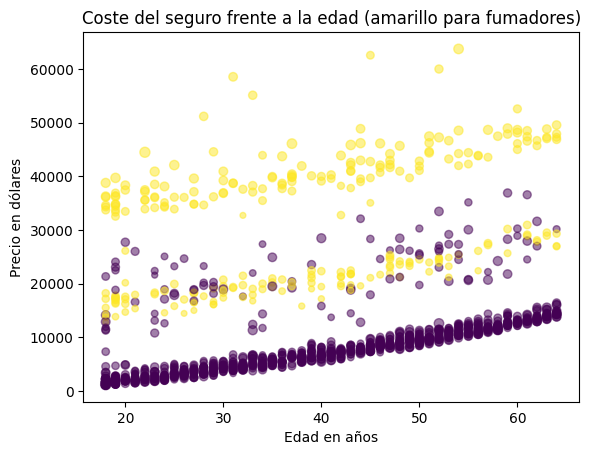

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = "age", y = "charges",  data=datos, alpha = 0.5 , c = 'fumador', s = "bmi")
ax.set_title("Coste del seguro frente a la edad (amarillo para fumadores)")
ax.set_xlabel("Edad en años")
ax.set_ylabel("Precio en dólares")
plt.show()

En el ejemplo anterior label no funciona bien. Una posible solución es:

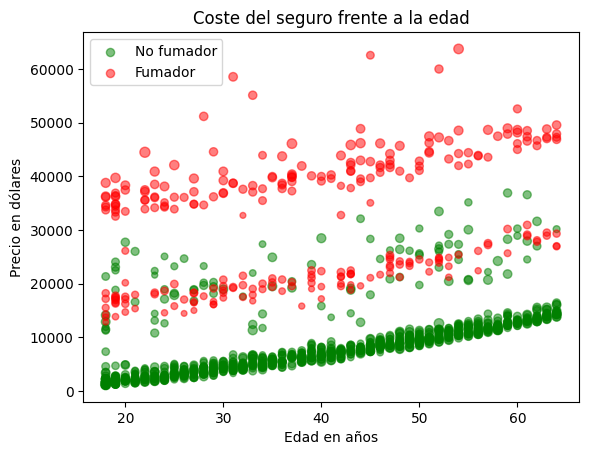

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = "age", y = "charges",  data=datos[datos.smoker=="no"], alpha = 0.5 , c = 'green', s = "bmi", label = "No fumador")
ax.scatter(x = "age", y = "charges",  data=datos[datos.smoker=="yes"], alpha = 0.5 , c = 'red', s = "bmi",  label = "Fumador")

ax.set_title("Coste del seguro frente a la edad")
ax.set_xlabel("Edad en años")
ax.set_ylabel("Precio en dólares")
ax.legend()
plt.show()

E003. Para el fichero insurance.csv muestra una figura con cuatro subplots, uno por cada región. En el eje x tiene que estar la edad y el en el eje y el coste del seguro. Hay que diferenciar (con colores, marcadores o tamaños) entre fumadores y no fumadores y entre hombres y mujeres. Para hacer la comparación más sencilla, es importante que los cuatro subplots tengan la misma escala en los ejes y que haya títulos en la figura, los subplots y los ejes.

In [ ]:
subset_hombres_fumadores = datos[(datos.smoker == "yes") & (datos.sex == "male")]
subset_mujeres_fumadoras = datos[(datos.smoker == "yes") & (datos.sex == "female")]
subset_hombres_no_fumadores = datos[(datos.smoker == "no") & (datos.sex == "male")]
subset_mujeres_no_fumadoras = datos[(datos.smoker == "no") & (datos.sex == "female")]

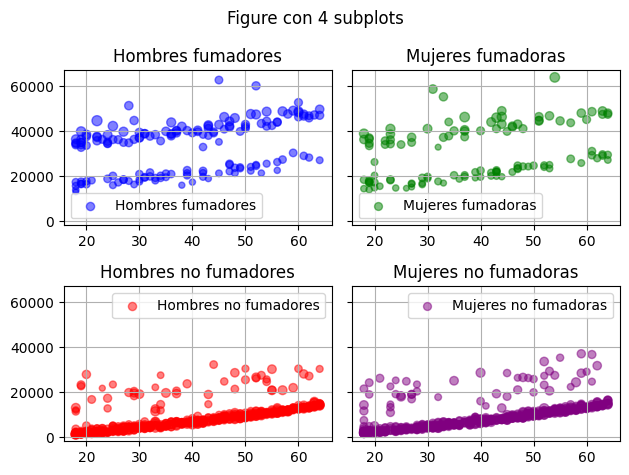

In [ ]:
# Crear subplots (2 filas, 2 columnas), compartir el eje y entre los gráficos
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True)

fig.suptitle("Figure con 4 subplots")


# Subplot 1: Hombres fumadores
ax[0, 0].scatter(x='age', y='charges', data=subset_hombres_fumadores, alpha=0.5, c='blue', s=subset_hombres_fumadores['bmi'], label="Hombres fumadores")

ax[0, 0].set_title('Hombres fumadores')
ax[0, 0].set_xlabel("Edad (años)")
ax[0, 0].set_ylabel("Precio ($)")

ax[0, 0].legend()
ax[0, 0].grid(True)



# Subplot 2: Mujeres fumadoras
ax[0, 1].scatter(x='age', y='charges', data=subset_mujeres_fumadoras, alpha=0.5, c='green', s=subset_mujeres_fumadoras['bmi'], label="Mujeres fumadoras")

ax[0, 1].set_title('Mujeres fumadoras')
ax[0, 1].set_xlabel("Edad (años)")
ax[0, 1].set_ylabel("Precio ($)")

ax[0, 1].legend()
ax[0, 1].grid(True)



# Subplot 3: Hombres no fumadores
ax[1, 0].scatter(x='age', y='charges', data=subset_hombres_no_fumadores, alpha=0.5, c='red', s=subset_hombres_no_fumadores['bmi'], label="Hombres no fumadores")

ax[1, 0].set_title('Hombres no fumadores')
ax[1, 0].set_xlabel("Edad (años)")
ax[1, 0].set_ylabel("Precio ($)")

ax[1, 0].legend()
ax[1, 0].grid(True)



# Subplot 4: Mujeres no fumadoras
ax[1, 1].scatter(x='age', y='charges', data=subset_mujeres_no_fumadoras, alpha=0.5, c='purple', s=subset_mujeres_no_fumadoras['bmi'], label="Mujeres no fumadoras")

ax[1, 1].set_title('Mujeres no fumadoras')
ax[1, 1].set_xlabel("Edad (años)")
ax[1, 1].set_ylabel("Precio ($)")

ax[1, 1].legend()
ax[1, 1].grid(True)



# Ajustar los subplots para que no se superpongan
plt.tight_layout(rect=[0, 0, 1, 1])

# Mostrar el gráfico
plt.show()
